In [1]:
import pandas as pd
open_source_8500 = pd.read_excel("../data/open_source_8500.xlsx") ## 舊名 IT-Ticket-Classification.xlsx
open_source_8500

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
...,...,...,...,...
8495,emails not coming in from zz mail,_x000D_\n_x000D_\nreceived from: avglmrts.vhqm...,avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62


In [6]:
import torch
import numpy as np

device=torch.device('cuda:0')
torch.cuda.get_device_name(0)

seed=123
torch.manual_seed(seed)
np.random.seed(seed)

# Paper步驟

In [7]:
callers = open_source_8500['Caller'].unique() 
callers.shape
open_source_8500.drop(["Caller",'Short description'],axis=1,inplace= True)
open_source_8500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Description       8499 non-null   object
 1   Assignment group  8500 non-null   object
dtypes: object(2)
memory usage: 132.9+ KB


In [8]:
targetClassCnt=open_source_8500['Assignment group'].value_counts()
targetClassCnt.describe()

count      74.000000
mean      114.864865
std       465.747516
min         1.000000
25%         5.250000
50%        26.000000
75%        84.000000
max      3976.000000
Name: count, dtype: float64

In [9]:
## 將樣本數少於10的組別歸類為一個新的組別 misc_grp

sample = open_source_8500.groupby(['Assignment group'])
regroup = []

for grp in open_source_8500['Assignment group'].unique():
    if sample.get_group((grp,)).shape[0] < 10:  # 改為元組形式 (grp,)
        regroup.append(grp)

print('Found {} groups which have under 10 samples'.format(len(regroup)))
open_source_8500['Assignment group'] = open_source_8500['Assignment group'].apply(
    lambda x: 'misc_grp' if x in regroup else x
)

# Unique Groups check 
open_source_8500['Assignment group'].unique()

Found 25 groups which have under 10 samples


array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'misc_grp', 'GRP_36', 'GRP_37', 'GRP_39',
       'GRP_40', 'GRP_41', 'GRP_42', 'GRP_44', 'GRP_45', 'GRP_47',
       'GRP_48', 'GRP_50', 'GRP_53', 'GRP_60', 'GRP_62', 'GRP_65'],
      dtype=object)

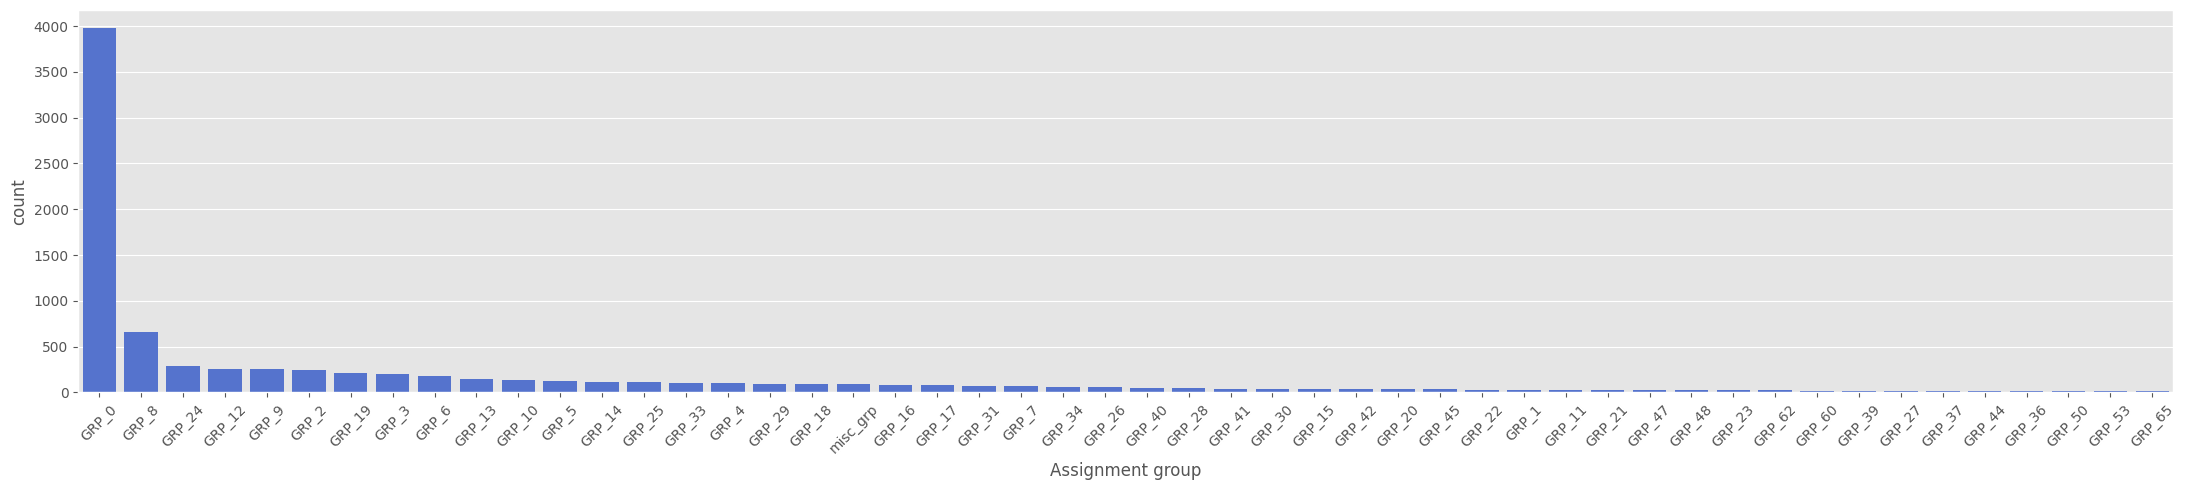

In [10]:
##Pre-Processing label Encoding on  Assignment Group
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

descending_order = open_source_8500['Assignment group'].value_counts().sort_values(ascending=False).index

plt.subplots(figsize=(22, 5))
ax = sns.countplot(x='Assignment group', data=open_source_8500, color='royalblue', order=descending_order)
ax.tick_params(axis='x', rotation=45)  # 設置旋轉

plt.tight_layout()
plt.show()

In [11]:
#Fill 'Decsription' field entries that have null with blank space
open_source_8500['Description'] = open_source_8500['Description'].fillna(' ')

In [12]:
open_source_8500

,Description,Assignment group
0,-verified user details.(employee# & manager na...,GRP_0
1,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,GRP_0
2,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,GRP_0
3,unable to access hr_tool page,GRP_0
4,skype error,GRP_0
...,...,...
8495,_x000D_\n_x000D_\nreceived from: avglmrts.vhqm...,GRP_29
8496,telephony_software issue,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,GRP_0
8498,i am unable to access the machine utilities to...,GRP_62


# paper Description處理

In [13]:
import re 
from dateutil import parser
def is_valid_date(date_str):
    try:
        parser.parse(date_str)
        return True
    except:
        return False

def clean_data(text):
    text=text.lower()
    text = ' '.join([w for w in text.split() if not is_valid_date(w)])
    text = re.sub(r"received from:",' ',text)
    text = re.sub(r"from:",' ',text)
    text = re.sub(r"to:",' ',text)
    text = re.sub(r"subject:",' ',text)
    text = re.sub(r"sent:",' ',text)
    text = re.sub(r"ic:",' ',text)
    text = re.sub(r"cc:",' ',text)
    text = re.sub(r"bcc:",' ',text)
    #Remove email 
    text = re.sub(r'\S*@\S*\s?', '', text)
    # Remove numbers 
    text = re.sub(r'\d+','' ,text)
    # Remove Non Dictionary character-TODO
    # Remove new line characters 
    text = re.sub(r'\n',' ',text)
    # Remove hashtag while keeping hashtag text
    text = re.sub(r'#','', text)
    #& 
    text = re.sub(r'&;?', 'and',text)
    # Remove HTML special entities (e.g. &amp;)
    text = re.sub(r'\&\w*;', '', text)
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)  
    # Remove characters beyond Readable formart by Unicode:
    text= ''.join(c for c in text if c <= '\uFFFF') 
    text = text.strip()
    # Remove unreadable characters  (also extra spaces)
    text = ' '.join(re.sub("[^\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())
    for name in callers:
      namelist = [part for part in name.split()]
      for namepart in namelist: 
          text = text.replace(namepart,'')
          
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    text = re.sub(' +', ' ', text)
    text = text.strip()
    return text
  
open_source_8500['Description'] = open_source_8500['Description'].apply(clean_data)
open_source_8500

,Description,Assignment group
0,verified user details employee and manager nam...,GRP_0
1,xd xd xd hello team xd xd my meetings skype me...,GRP_0
2,xd xd xd hi xd xd cannot log on to vpn xd xd best,GRP_0
3,unable to access hr tool page,GRP_0
4,skype error,GRP_0
...,...,...
8495,xd xd xd good afternoon xd am not receiving th...,GRP_29
8496,telephony software issue,GRP_0
8497,vip windows password reset for tifpdchb pedxruyf,GRP_0
8498,i am unable to access the machine utilities to...,GRP_62


In [14]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 
def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)

In [15]:
open_source_8500.reset_index(drop=True,inplace=True)

open_source_8500['cleanText']=open_source_8500['Description'].map(lambda s:preprocess(s))

open_source_8500['cleanText']

0       verified user details employee manager name ch...
1       hello team meetings skype meetings etc appeari...
2                                     cannot log vpn best
3                                 unable access tool page
4                                             skype error
                              ...                        
8495    good afternoon receiving emails sent mail plea...
8496                             telephony software issue
8497         vip windows password reset tifpdchb pedxruyf
8498    unable access machine utilities finish drawers...
8499    mehreren lassen sich verschiedene prgramdntyme...
Name: cleanText, Length: 8500, dtype: object

In [16]:
from sklearn import preprocessing
def labelencoder(dataframe) : 
  label_encoder = preprocessing.LabelEncoder() 
  dataframe= label_encoder.fit_transform(dataframe)
  grp_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
  return dataframe,grp_mapping

#itTicketGRP0DF['Assignment group'] , grp_mapping_grp0= labelencoder(itTicketGRP0DF['Assignment group'])
#itTicketOthersDF_resampled['Assignment group'] , grp_mapping_others_resampled= labelencoder(itTicketOthersDF_resampled['Assignment group'])
#otherGrpsResampled['Assignment group'] , grp_mapping_others_resampled= labelencoder(otherGrpsResampled['Assignment group'])
#itTicketDF_resampled['Assignment group'] , grp_mapping_all_resampled= labelencoder(itTicketDF_resampled['Assignment group'])
open_source_8500['Assignment_group_label'],grp_mapping_all_raw = labelencoder(open_source_8500['Assignment group'])

In [17]:
open_source_8500

,Description,Assignment group,cleanText,Assignment_group_label
0,verified user details employee and manager nam...,GRP_0,verified user details employee manager name ch...,0
1,xd xd xd hello team xd xd my meetings skype me...,GRP_0,hello team meetings skype meetings etc appeari...,0
2,xd xd xd hi xd xd cannot log on to vpn xd xd best,GRP_0,cannot log vpn best,0
3,unable to access hr tool page,GRP_0,unable access tool page,0
4,skype error,GRP_0,skype error,0
...,...,...,...,...
8495,xd xd xd good afternoon xd am not receiving th...,GRP_29,good afternoon receiving emails sent mail plea...,22
8496,telephony software issue,GRP_0,telephony software issue,0
8497,vip windows password reset for tifpdchb pedxruyf,GRP_0,vip windows password reset tifpdchb pedxruyf,0
8498,i am unable to access the machine utilities to...,GRP_62,unable access machine utilities finish drawers...,44


## Resample

<Axes: xlabel='Assignment group', ylabel='count'>

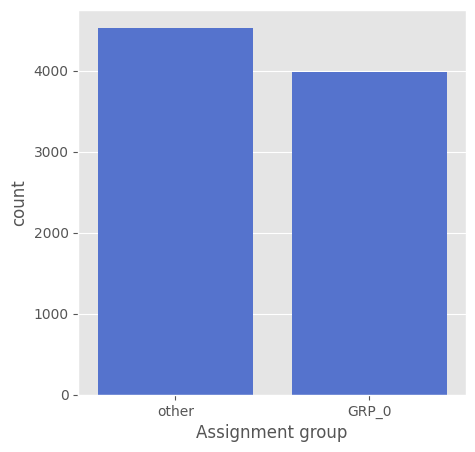

In [20]:
import seaborn as sns
itTicketGRP0DF = open_source_8500.copy()
itTicketGRP0DF['Assignment group']=itTicketGRP0DF['Assignment group'].apply(lambda x : 'other' if x != 'GRP_0'  else x)

descending_order = itTicketGRP0DF['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(5,5))
sns.countplot(x='Assignment group', data=itTicketGRP0DF, color='royalblue',order=descending_order)

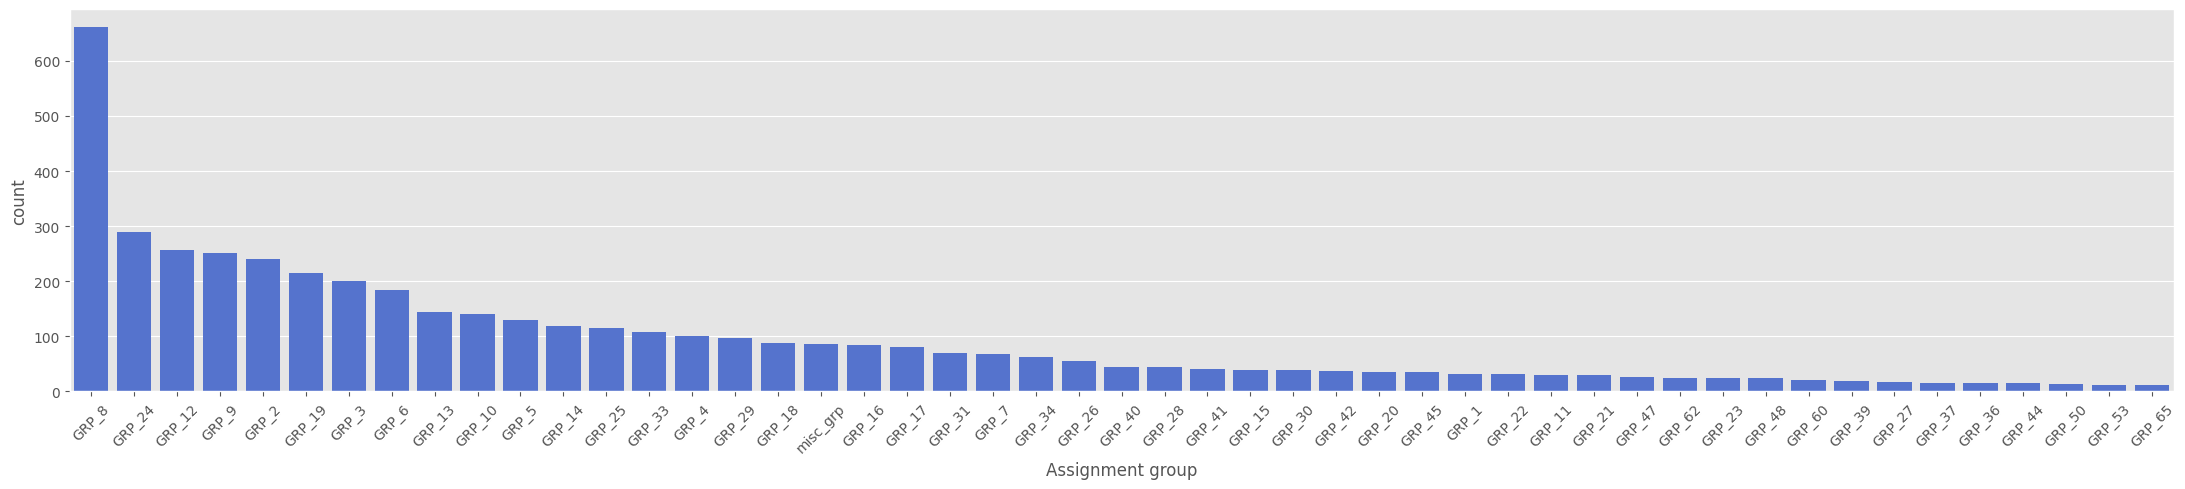

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# 過濾掉 'GRP_0' 組別
itTicketOthersDF = open_source_8500[open_source_8500['Assignment group'] != 'GRP_0']

# 獲取按頻率排序的 Assignment group
descending_order = itTicketOthersDF['Assignment group'].value_counts().sort_values(ascending=False).index

plt.subplots(figsize=(22, 5))
ax = sns.countplot(x='Assignment group', data=itTicketOthersDF, color='royalblue', order=descending_order)

# 使用 tick_params 設置標籤旋轉
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [22]:
maxOthers = itTicketOthersDF['Assignment group'].value_counts().max()
maxOthers

661

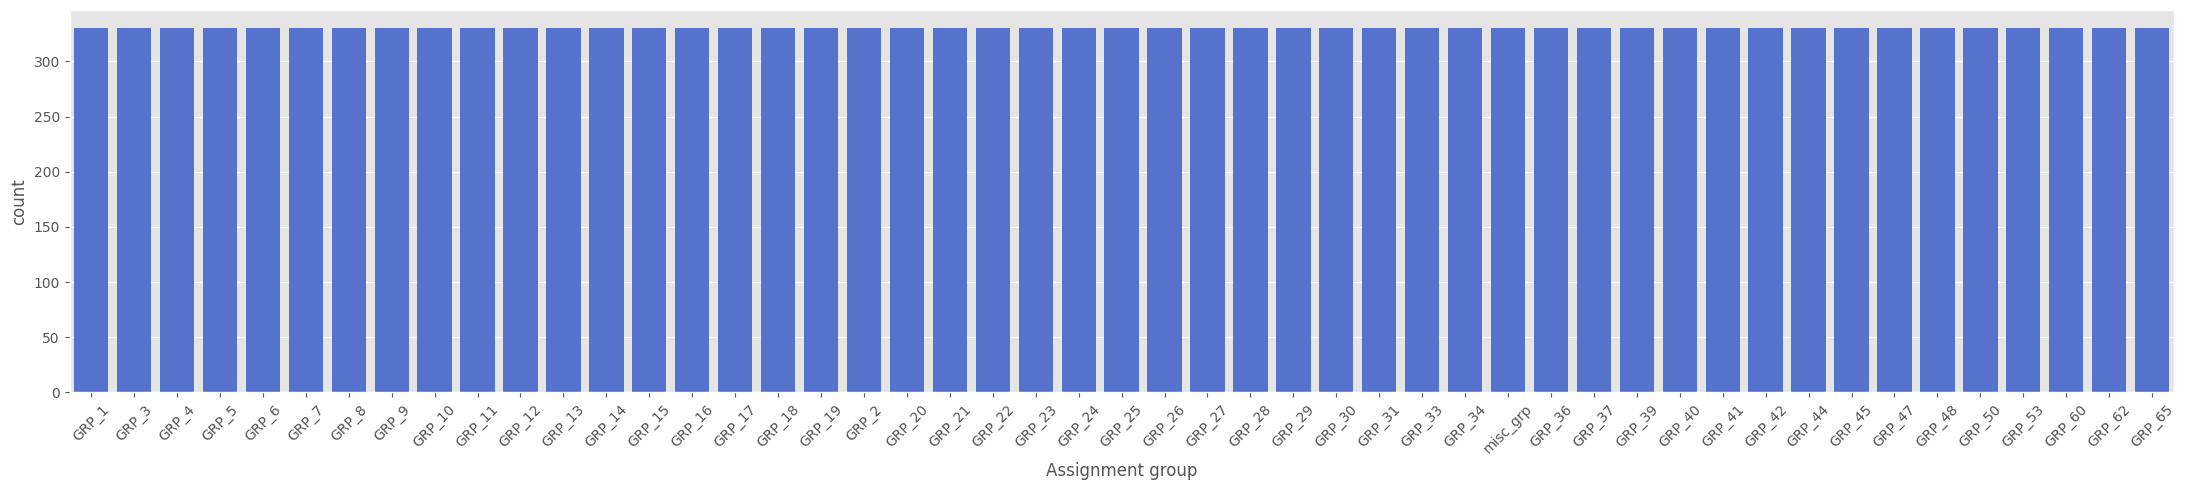

In [23]:
from sklearn.utils import resample
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 初始化空的 DataFrame
itTicketOthersDF_resampled = pd.DataFrame()

# 進行重抽樣
for grp in itTicketOthersDF['Assignment group'].unique():
    itTicketGrpDF = itTicketOthersDF[itTicketOthersDF['Assignment group'] == grp]
    resampled = resample(itTicketGrpDF, replace=True, n_samples=int(maxOthers / 2), random_state=123)
    itTicketOthersDF_resampled = pd.concat([itTicketOthersDF_resampled, resampled], ignore_index=True)

# 合併資料
otherGrpsResampled = pd.concat([itTicketGRP0DF, itTicketOthersDF_resampled], ignore_index=True)
otherGrpsResampled.reset_index(inplace=True, drop=True)

# 繪製圖表
plt.subplots(figsize=(22, 5))
ax = sns.countplot(x='Assignment group', data=itTicketOthersDF_resampled, color='royalblue')

# 使用 tick_params 設置旋轉標籤
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

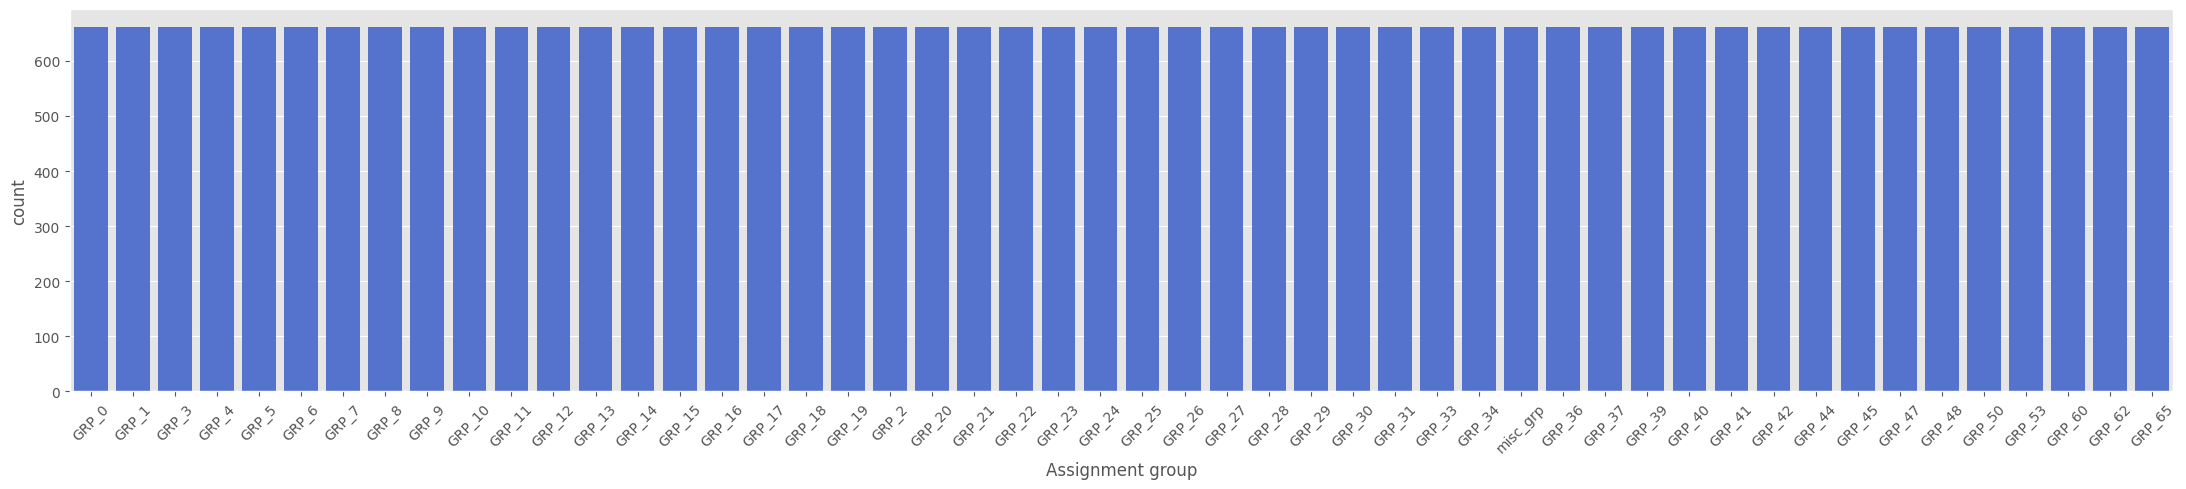

In [24]:
from sklearn.utils import resample
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 初始化空的 DataFrame
itTicketDF_resampled = pd.DataFrame()

# 進行重抽樣
for grp in open_source_8500['Assignment group'].unique():
    itTicketGrpDF = open_source_8500[open_source_8500['Assignment group'] == grp]
    resampled = resample(itTicketGrpDF, replace=True, n_samples=661, random_state=123)  # 將 n_samples 設為 661
    itTicketDF_resampled = pd.concat([itTicketDF_resampled, resampled], ignore_index=True)

# 繪製圖表
plt.subplots(figsize=(22, 5))
ax = sns.countplot(x='Assignment group', data=itTicketDF_resampled, color='royalblue')

# 使用 tick_params 設置旋轉標籤
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [25]:
from sklearn import preprocessing
def labelencoder(dataframe) : 
  label_encoder = preprocessing.LabelEncoder() 
  dataframe= label_encoder.fit_transform(dataframe)
  grp_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
  return dataframe,grp_mapping

#itTicketGRP0DF['Assignment group'] , grp_mapping_grp0= labelencoder(itTicketGRP0DF['Assignment group'])
#itTicketOthersDF_resampled['Assignment group'] , grp_mapping_others_resampled= labelencoder(itTicketOthersDF_resampled['Assignment group'])
#otherGrpsResampled['Assignment group'] , grp_mapping_others_resampled= labelencoder(otherGrpsResampled['Assignment group'])
itTicketDF_resampled['Assignment group'] , grp_mapping_all_resampled= labelencoder(itTicketDF_resampled['Assignment group'])
#itTicketDF['Assignment group'],grp_mapping_all_raw = labelencoder(itTicketDF['Assignment group'])

In [26]:
from sklearn import preprocessing
def labelencoder(dataframe) : 
  label_encoder = preprocessing.LabelEncoder() 
  dataframe= label_encoder.fit_transform(dataframe)
  grp_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
  return dataframe,grp_mapping

#itTicketGRP0DF['Assignment group'] , grp_mapping_grp0= labelencoder(itTicketGRP0DF['Assignment group'])
#itTicketOthersDF_resampled['Assignment group'] , grp_mapping_others_resampled= labelencoder(itTicketOthersDF_resampled['Assignment group'])
otherGrpsResampled['Assignment group'] , grp_mapping_others_resampled= labelencoder(otherGrpsResampled['Assignment group'])
itTicketDF_resampled['Assignment group'] , grp_mapping_all_resampled= labelencoder(itTicketDF_resampled['Assignment group'])
open_source_8500['Assignment group'],grp_mapping_all_raw = labelencoder(open_source_8500['Assignment group'])

In [30]:
# Using itTicketDF_resampled dataset 
df=itTicketDF_resampled

In [32]:
df = df[df['cleanText'].notnull()]
df

,Description,Assignment group,cleanText,Assignment_group_label
0,it please kindly set up mobile link company ma...,0,please kindly set mobile link company mail use...,0
1,login issue xd verified user details employee ...,0,login issue verified user details employee man...,0
2,summary sound not working on pc,0,summary sound working,0
3,windows password reset request,0,windows password reset request,0
4,ticket update on inplant,0,ticket update inplant,0
...,...,...,...,...
33045,good day all we need to rebuild win laptop and...,45,good day need rebuild win laptop new win image...,45
33046,observing below alert in monitoring tool since...,45,observing alert monitoring tool since monitori...,45
33047,observing below alert in monitoring tool since...,45,observing alert monitoring tool since monitori...,45
33048,when users delete the update it will run the u...,45,users delete update run update every day updat...,45


In [40]:
df['Inbound Message'] = df['cleanText']
df['Label']= df['Assignment_group_label']

In [41]:
from sklearn.model_selection import train_test_split
df_train,df_val=train_test_split(df,test_size=0.2 ,random_state=123)  # 80% train & 10 % validation & 10% test set
df_val,df_test=train_test_split(df_val,test_size=0.5 ,random_state=123)

print('Print the shape of datasets...')
print(f'Training dataset : {df_train.shape} ')
print(f'Testing dataset : {df_test.shape}') 
print(f'Validation dataset : {df_val.shape}')

Print the shape of datasets...
Training dataset : (26440, 6) 
Testing dataset : (3305, 6)
Validation dataset : (3305, 6)


In [36]:
df['cleanText']

0        please kindly set mobile link company mail use...
1        login issue verified user details employee man...
2                                    summary sound working
3                           windows password reset request
4                                    ticket update inplant
                               ...                        
33045    good day need rebuild win laptop new win image...
33046    observing alert monitoring tool since monitori...
33047    observing alert monitoring tool since monitori...
33048    users delete update run update every day updat...
33049    users delete update run update every day updat...
Name: cleanText, Length: 33050, dtype: object

# paper train BERT

In [32]:
from transformers import BertTokenizer, BertModel
pre_trained_BERTmodel='bert-base-uncased'
BERT_tokenizer=BertTokenizer.from_pretrained(pre_trained_BERTmodel, do_lower_case=True)

In [46]:
token_lens=[]
for message in df_train['Inbound Message']:
  tokens_message=BERT_tokenizer.encode(message, max_length=150,truncation=True)
  token_lens.append(len(tokens_message))

C:\Users\User\AppData\Local\Temp\ipykernel_22932\1734226617.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(token_lens)


Text(0.5, 0, 'Token count')

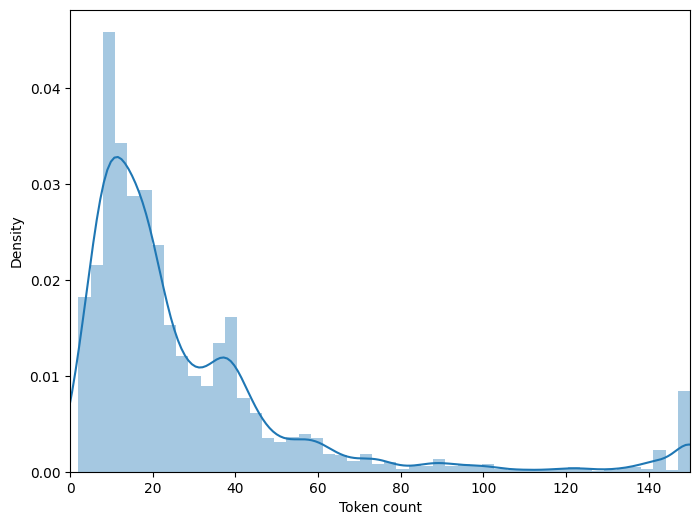

In [47]:
#Plot the tokens
plt.figure(figsize=(8,6))
sns.distplot(token_lens)
plt.xlim([0,150])
plt.xlabel('Token count')

In [48]:
from torch.utils.data import Dataset
class message_Dataset(Dataset):

  def __init__(self, messages, targets, tokenizer, max_length):
    self.messages=messages
    self.targets=targets
    self.tokenizer=tokenizer
    self.max_length=max_length

  def __len__(self):
    return len(self.messages)

  def __getitem__(self,item):
    message = str(self.messages[item])
    targets = self.targets[item]

    encoding = self.tokenizer.encode_plus(
        message,
        max_length=Max_length,
        add_special_tokens=True,
        pad_to_max_length=True,
        truncation=True,
        return_attention_mask=True,
        return_token_type_ids=False,
        return_tensors='pt'
       )
           
    return {
        'message_text':message,
        'input_ids':encoding['input_ids'].flatten(),
        'attention_mask':encoding['attention_mask'].flatten(),
        'targets' : torch.tensor(targets,dtype=torch.long)
    }

In [50]:
from torch.utils.data import DataLoader, Dataset
batch_size=8
Max_length= 35
def data_loader(df,tokenizer, max_length, batch):
  ds=message_Dataset(
      messages=df['Inbound Message'].to_numpy(),
      targets=df['Label'].to_numpy(),
      tokenizer=tokenizer,
      max_length=Max_length
  )

  return DataLoader(
      ds,
      batch_size=batch_size,
      num_workers=4
  )

# Load datasets
train_DataLoader=data_loader(df_train, BERT_tokenizer,Max_length,batch_size)
test_DataLoader=data_loader(df_test, BERT_tokenizer,Max_length,batch_size)
valid_DataLoader=data_loader(df_val, BERT_tokenizer,Max_length,batch_size)

In [ ]:
BERT_data=next(iter(train_DataLoader))
BERT_data.keys()

In [ ]:
#dict_keys(['message_text', 'input_ids', 'attention_mask', 'targets'])
print('Shape of the BERT_data keys...')
print(f"Input_ids : {BERT_data['input_ids'].shape}")
print(f"Attention_mask : {BERT_data['attention_mask'].shape}")
print(f"targets : {BERT_data['targets'].shape}")

In [ ]:
input_ids = BERT_data['input_ids'].to(device)
attention_mask = BERT_data['attention_mask'].to(device)
targets=BERT_data['targets'].to(device)
print(input_ids.shape)      # batch size x seq length
print(attention_mask.shape) # batch size x seq length

In [ ]:
BERT_model = BertModel.from_pretrained(pre_trained_BERTmodel)
BERT_model=BERT_model.to(device)

In [ ]:
n_classes=df['Label'].nunique()

In [ ]:
class BERT_SentimentClassifier(nn.Module):
   def __init__(self, n_classes):
     super(BERT_SentimentClassifier, self).__init__()
     self.bert = BertModel.from_pretrained(pre_trained_BERTmodel)
     ### New layers:
     self.lstm = nn.LSTM(768, 256, batch_first=True,bidirectional=True)
     self.drop = nn.Dropout(p=float(0.6))
     self.linear = nn.Linear(256*2, n_classes)
     #self.drop1 = nn.Dropout(p=float(0.1))
     #self.hidden=nn.Linear(self.bert.config.hidden_size,256)
     #self.drop2 = nn.Dropout(p=float(0.1))
     #self.out = nn.Linear(256, n_classes)
   def forward(self, input_ids, attention_mask):
     sequence_output, pooled_output = self.bert(
         input_ids=input_ids,
         attention_mask=attention_mask,
         return_dict=False
    )
     # sequence_output has the following shape: (batch_size, sequence_length, 768)
     lstm_output, (h,c) = self.lstm(sequence_output) ## extract the 1st token's embeddings
     hidden = torch.cat((lstm_output[:,-1, :256],lstm_output[:,0, 256:]),dim=-1)
     output = self.drop(lstm_output)
     linear_output = self.linear(output[:,-1].view(-1,256*2)) ### We are only using the output of the last LSTM cell to perform classification

     #output = self.drop1(pooled_output)
     #output=self.hidden(output)
     #output = self.drop2(output)
     #output=self.out(output)
     return linear_output

# 自己架設BERT

In [49]:
df_train

,Description,Assignment group,cleanText,Assignment_group_label,Inbound Message,Label
22228,summary need access to the following folder fo...,27,summary need access following folder financial...,27,summary need access following folder financial...,27
24502,volume label dat hostname data efce on server ...,30,volume label dat hostname data efce server spa...,30,volume label dat hostname data efce server spa...,30
21335,telefon mit der nummer ist defekt sinterei ger...,26,telefon mit der nummer ist defekt sinterei ger...,26,telefon mit der nummer ist defekt sinterei ger...,26
27363,crysyhtal xithya xd pm xd nwfodmhc exurcwkm xd...,35,crysyhtal xithya nwfodmhc exurcwkm cindy wanrt...,35,crysyhtal xithya nwfodmhc exurcwkm cindy wanrt...,35
30661,a student is working on project with vinhytry ...,41,student working project vinhytry reported pass...,41,student working project vinhytry reported pass...,41
...,...,...,...,...,...,...
7763,usa backup exec server rgtsm has filed raid hd...,4,usa backup exec server rgtsm filed raid hdd ph...,4,usa backup exec server rgtsm filed raid hdd ph...,4
15377,xd xd xd dear sir xd am not able to login in e...,16,dear sir able login ethics portal complete cou...,16,dear sir able login ethics portal complete cou...,16
17730,skype call join ends up in bad call or blanks ...,19,skype call join ends bad call blanks multiple ...,19,skype call join ends bad call blanks multiple ...,19
28030,i have no where to insert an amount to allow m...,36,insert amount allow ship reached,36,insert amount allow ship reached,36


In [42]:
from transformers import BertTokenizer
import torch
from torch.utils.data import Dataset, DataLoader

# 初始化 BERT 的 tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

class CustomDataset(Dataset):
    def __init__(self, messages, labels, tokenizer, max_length):
        self.messages = messages
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.messages)

    def __getitem__(self, idx):
        message = str(self.messages[idx])
        label = self.labels[idx]
        
        encoding = self.tokenizer.encode_plus(
            message,
            max_length=self.max_length,
            add_special_tokens=True,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# 定義數據集
MAX_LENGTH = 128
train_dataset = CustomDataset(
    messages=df_train['Inbound Message'].tolist(),
    labels=df_train['Label'].tolist(),
    tokenizer=tokenizer,
    max_length=MAX_LENGTH
)

val_dataset = CustomDataset(
    messages=df_val['Inbound Message'].tolist(),
    labels=df_val['Label'].tolist(),
    tokenizer=tokenizer,
    max_length=MAX_LENGTH
)

test_dataset = CustomDataset(
    messages=df_test['Inbound Message'].tolist(),
    labels=df_test['Label'].tolist(),
    tokenizer=tokenizer,
    max_length=MAX_LENGTH
)

# 創建 DataLoader
BATCH_SIZE = 16
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

In [43]:
from transformers import BertForSequenceClassification

# 初始化 BERT 模型
NUM_LABELS = len(df_train['Label'].unique())  # 獲取標籤數量
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=NUM_LABELS)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [44]:
from transformers import AdamW
from torch.nn import CrossEntropyLoss
from torch.optim import AdamW

optimizer = AdamW(model.parameters(), lr=5e-5)
criterion = CrossEntropyLoss()

In [45]:
from tqdm import tqdm
import torch.nn.functional as F

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

EPOCHS = 3

def train_epoch(model, dataloader, optimizer, criterion):
    model.train()
    total_loss = 0

    for batch in tqdm(dataloader):
        optimizer.zero_grad()

        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()
    
    return total_loss / len(dataloader)

def eval_model(model, dataloader, criterion):
    model.eval()
    total_loss = 0
    correct_predictions = 0

    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            loss = criterion(logits, labels)
            total_loss += loss.item()

            _, preds = torch.max(logits, dim=1)
            correct_predictions += torch.sum(preds == labels)
    
    accuracy = correct_predictions.double() / len(dataloader.dataset)
    return total_loss / len(dataloader), accuracy

# 開始訓練
for epoch in range(EPOCHS):
    print(f"Epoch {epoch + 1}/{EPOCHS}")
    train_loss = train_epoch(model, train_dataloader, optimizer, criterion)
    val_loss, val_accuracy = eval_model(model, val_dataloader, criterion)
    print(f"Train loss: {train_loss} | Val loss: {val_loss} | Val accuracy: {val_accuracy}")

Epoch 1/3


100%|██████████| 1653/1653 [11:34<00:00,  2.38it/s]


Train loss: 1.5469709053383187 | Val loss: 0.5277566103903568 | Val accuracy: 0.8390317700453858
Epoch 2/3


100%|██████████| 1653/1653 [11:36<00:00,  2.37it/s]


Train loss: 0.42447333112899926 | Val loss: 0.3536219036809488 | Val accuracy: 0.8795763993948562
Epoch 3/3


100%|██████████| 1653/1653 [11:36<00:00,  2.37it/s]


Train loss: 0.31740716987453443 | Val loss: 0.35448930090392267 | Val accuracy: 0.8853252647503781


In [46]:
test_loss, test_accuracy = eval_model(model, test_dataloader, criterion)
print(f"Test loss: {test_loss} | Test accuracy: {test_accuracy}")

Test loss: 0.3593180418635408 | Test accuracy: 0.8786686838124054


In [47]:
from datetime import datetime
def model_save(fname):
    # 取得當前日期和時間
    current_date = datetime.now()
    # 格式化日期為 "YYYY_MMDD" 格式
    formatted_date = current_date.strftime('%Y_%m%d')
    model.save_pretrained('../models/' + formatted_date + '_' + fname)
    tokenizer.save_pretrained('../models/' + formatted_date + '_' + fname)

In [48]:
model_save('gpt_bert_ver2_把少於10筆的data變成label65')